## FNN: Fully Connected Neural Network - Basics

### Goal: Classify whether a mushroom is poisonous or edible based on its attributes.

#### Structure: Here, we will create 3 different versions of a FNN. They will all contain the same loss function, optimizer, and so on. The difference will be in the number of layers, where we will track how the weights change along with the performance of the model.

### 0. Imports

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### 1. Read Data

In [2]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [30]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [33]:
# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.long)
y_test_tensor = torch.tensor(y_test, dtype = torch.long)

### 3. Create NN

#### 3.1: One Layer

In [35]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_dimensions, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.output_layer = nn.Linear(8, output_size)


    # feedforward function
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

#### 3.2: 5 Layers

In [36]:
class NeuralNetwork2(nn.Module):
    def __init__(self, input_size, hidden_dimensions, output_size):
        super(NeuralNetwork2, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 8)
        self.fc5 = nn.Linear(8, 8)
        self.output_layer = nn.Linear(8, output_size)


    # feedforward function
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

#### 3.3: 10 Layers

In [37]:
class NeuralNetwork3(nn.Module):
    def __init__(self, input_size, hidden_dimensions, output_size):
        super(NeuralNetwork3, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 8)
        self.fc5 = nn.Linear(8, 8)
        self.fc6 = nn.Linear(8, 8)
        self.fc7 = nn.Linear(8, 8)
        self.fc8 = nn.Linear(8, 8)
        self.fc9 = nn.Linear(8, 8)
        self.fc10 = nn.Linear(8, 8)
        self.output_layer = nn.Linear(8, output_size)


    # feedforward function
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))
        x = torch.relu(self.fc10(x)) 
        x = torch.sigmoid(self.output_layer(x))
        return x

### 3. Train Model

#### 3.1: One Layer Model
##### Notes: It seems as if the accuracy of the model can hover around 65% if the number of hidden dimensions is around 8.

In [38]:
# variables needed
input_size = X_train.shape[1]
hidden_dimensions = 8
output_size = len(set(y))

# initialize model
model = NeuralNetwork(input_size, hidden_dimensions, output_size)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)

# number of training loops
epochs = 200

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)

    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/200], Loss: 0.6835
Epoch [20/200], Loss: 0.6818
Epoch [30/200], Loss: 0.6685
Epoch [40/200], Loss: 0.6678
Epoch [50/200], Loss: 0.6659
Epoch [60/200], Loss: 0.6651
Epoch [70/200], Loss: 0.6642
Epoch [80/200], Loss: 0.6632
Epoch [90/200], Loss: 0.6624
Epoch [100/200], Loss: 0.6619
Epoch [110/200], Loss: 0.6615
Epoch [120/200], Loss: 0.6611
Epoch [130/200], Loss: 0.6608
Epoch [140/200], Loss: 0.6605
Epoch [150/200], Loss: 0.6602
Epoch [160/200], Loss: 0.6599
Epoch [170/200], Loss: 0.6596
Epoch [180/200], Loss: 0.6594
Epoch [190/200], Loss: 0.6591
Epoch [200/200], Loss: 0.6589


In [11]:
# variables needed
input_size = X_train.shape[1]
hidden_dimensions = 8
output_size = len(set(y))

# initialize model
model2 = NeuralNetwork2(input_size, hidden_dimensions, output_size)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), 0.001)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)

# number of training loops
epochs = 200

for epoch in range(epochs):
    model2.train()
    optimizer.zero_grad()

    output = model2(X_train_tensor)

    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/200], Loss: 0.7569
Epoch [20/200], Loss: 0.6951
Epoch [30/200], Loss: 0.6815
Epoch [40/200], Loss: 0.6783
Epoch [50/200], Loss: 0.6759
Epoch [60/200], Loss: 0.6739
Epoch [70/200], Loss: 0.6722
Epoch [80/200], Loss: 0.6708
Epoch [90/200], Loss: 0.6698
Epoch [100/200], Loss: 0.6691
Epoch [110/200], Loss: 0.6686
Epoch [120/200], Loss: 0.6681
Epoch [130/200], Loss: 0.6675
Epoch [140/200], Loss: 0.6667
Epoch [150/200], Loss: 0.6657
Epoch [160/200], Loss: 0.6645
Epoch [170/200], Loss: 0.6636
Epoch [180/200], Loss: 0.6627
Epoch [190/200], Loss: 0.6617
Epoch [200/200], Loss: 0.6610


In [12]:
# variables needed
input_size = X_train.shape[1]
hidden_dimensions = 8
output_size = len(set(y))

# initialize model
model3 = NeuralNetwork3(input_size, hidden_dimensions, output_size)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), 0.001)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)

# number of training loops
epochs = 200

for epoch in range(epochs):
    model3.train()
    optimizer.zero_grad()

    output = model3(X_train_tensor)

    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.6942
Epoch [20/200], Loss: 0.6931
Epoch [30/200], Loss: 0.6920
Epoch [40/200], Loss: 0.6905
Epoch [50/200], Loss: 0.6883
Epoch [60/200], Loss: 0.6851
Epoch [70/200], Loss: 0.6801
Epoch [80/200], Loss: 0.6741
Epoch [90/200], Loss: 0.6673
Epoch [100/200], Loss: 0.6600
Epoch [110/200], Loss: 0.6534
Epoch [120/200], Loss: 0.6486
Epoch [130/200], Loss: 0.6463
Epoch [140/200], Loss: 0.6449
Epoch [150/200], Loss: 0.6431
Epoch [160/200], Loss: 0.6421
Epoch [170/200], Loss: 0.6414
Epoch [180/200], Loss: 0.6408
Epoch [190/200], Loss: 0.6403
Epoch [200/200], Loss: 0.6399


### 4. Evaluation

In [13]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())

# look at number of data points versus 
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 54.73%


In [14]:
model2.eval()
with torch.no_grad():
    outputs = model2(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())

# look at number of data points versus 
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 54.58%


In [15]:
model3.eval()
with torch.no_grad():
    outputs = model3(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())

# look at number of data points versus 
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 64.07%


### 5. Weight Investigation

In [17]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())
    print("Name:", name,"\nWeights:",param.data)

Name: fc1.weight 
Weights: tensor([[ 0.2387,  0.0258, -0.3252,  0.1016, -0.3942,  0.1539, -0.1679, -0.1363],
        [-0.2809, -0.3775,  0.3450,  0.1672,  0.0327, -0.0880,  0.0327, -0.1802],
        [ 0.2990,  0.0234,  0.0285, -0.1127,  0.2231, -0.3995, -0.2106,  0.0007],
        [-0.2504, -0.1502,  0.0345,  0.0789,  0.1604, -0.1709,  0.0305, -0.1773],
        [ 0.0175, -0.3634, -0.0414, -0.1690, -0.2371,  0.2215,  0.0031, -0.2760],
        [ 0.3078,  0.4919, -0.1406,  0.1532, -0.0693, -0.0619, -0.5109,  0.0617],
        [ 0.2909, -0.2655, -0.1063,  0.0360, -0.0134, -0.0398, -0.1900, -0.3218],
        [ 0.0015,  0.4539,  0.1389,  0.2444, -0.0710,  0.3623,  0.1103, -0.0593]])
Name: fc1.bias 
Weights: tensor([-0.0063,  0.2964,  0.1121, -0.1362, -0.3389,  0.2712, -0.3071,  0.1033])
Name: output_layer.weight 
Weights: tensor([[-0.3252, -0.0891, -0.0938, -0.1069, -0.3295, -0.3057, -0.1696, -0.3456],
        [-0.0844, -0.1708,  0.3559, -0.2348, -0.3235,  0.0879, -0.3376,  0.2611]])
Name: out

In [18]:
model_dict

{'name': ['fc1.weight',
  'fc1.bias',
  'output_layer.weight',
  'output_layer.bias'],
 'weights': [array([[ 0.23869374,  0.02584178, -0.32520738,  0.10164981, -0.39416698,
           0.15387496, -0.1679393 , -0.13626201],
         [-0.28093806, -0.37753716,  0.3450295 ,  0.16721071,  0.03270569,
          -0.08800536,  0.03269282, -0.18017702],
         [ 0.29904163,  0.02336185,  0.0284912 , -0.1126909 ,  0.22307822,
          -0.39947554, -0.21062909,  0.00074621],
         [-0.2504399 , -0.15019922,  0.03448501,  0.07894401,  0.16038372,
          -0.17093422,  0.03053706, -0.17733952],
         [ 0.01751198, -0.36336544, -0.04138327, -0.16895126, -0.23705816,
           0.22147001,  0.00308962, -0.27595672],
         [ 0.3078053 ,  0.49191186, -0.14063422,  0.15316725, -0.0693302 ,
          -0.06191294, -0.51086813,  0.06165016],
         [ 0.29091328, -0.26550615, -0.10627773,  0.03598186, -0.01335853,
          -0.03977702, -0.19003245, -0.32178313],
         [ 0.00148033,  0.4

In [19]:
# dictionary to hold names and weights associated with each layer
model_dict2 = {"name":[], "weights":[]}

for name, param in model2.state_dict().items():
    model_dict2["name"].append(name)
    model_dict2["weights"].append(param.data.numpy())
    print("Name:", name,"\nWeights:",param.data)

Name: fc1.weight 
Weights: tensor([[ 0.1728,  0.2686, -0.0428, -0.0965, -0.0634,  0.3046, -0.0115,  0.4522],
        [ 0.0091, -0.0811, -0.0602,  0.0360,  0.0484,  0.3978, -0.0612, -0.3473],
        [-0.1340, -0.3210, -0.5111, -0.5259,  0.1246,  0.3245,  0.0723, -0.3573],
        [-0.2698, -0.3491, -0.2754,  0.1513, -0.1010,  0.0210, -0.0819,  0.2670],
        [-0.0706,  0.1300, -0.1344,  0.3509,  0.6550,  0.0853,  0.4636,  0.5317],
        [-0.0050, -0.1643,  0.1602, -0.3576, -0.0093, -0.1444,  0.1237, -0.0999],
        [ 0.4684, -0.0952,  0.3299,  0.1859,  0.3090, -0.1921,  0.2687,  0.4617],
        [ 0.1116,  0.2330,  0.2869,  0.4408, -0.0760,  0.2352,  0.0895, -0.1207]])
Name: fc1.bias 
Weights: tensor([ 0.4895,  0.0623, -0.5470, -0.3798,  0.5818, -0.0200, -0.0246, -0.1917])
Name: fc2.weight 
Weights: tensor([[ 0.2576, -0.1458, -0.2538,  0.2041,  0.4500,  0.3044, -0.3330,  0.0208],
        [-0.1951, -0.2000,  0.0996,  0.2265,  0.1476, -0.0742, -0.2026, -0.1134],
        [ 0.2025, -

In [20]:
model_dict2

{'name': ['fc1.weight',
  'fc1.bias',
  'fc2.weight',
  'fc2.bias',
  'fc3.weight',
  'fc3.bias',
  'fc4.weight',
  'fc4.bias',
  'fc5.weight',
  'fc5.bias',
  'output_layer.weight',
  'output_layer.bias'],
 'weights': [array([[ 0.17277227,  0.26863208, -0.04275465, -0.09647609, -0.06344716,
           0.30462858, -0.01150278,  0.45218542],
         [ 0.00909317, -0.08114912, -0.06020085,  0.03596245,  0.04842234,
           0.3977975 , -0.06119859, -0.3473499 ],
         [-0.133974  , -0.32099256, -0.51109105, -0.5258687 ,  0.12463006,
           0.32451677,  0.07228115, -0.35728648],
         [-0.26981476, -0.34908095, -0.27539432,  0.1513378 , -0.10103544,
           0.02098911, -0.0818983 ,  0.26695317],
         [-0.0706021 ,  0.12999448, -0.13435039,  0.35086995,  0.6550047 ,
           0.08530773,  0.46357974,  0.53169554],
         [-0.00500128, -0.16431095,  0.16018032, -0.35758084, -0.00933139,
          -0.14436778,  0.12367626, -0.09987406],
         [ 0.46837005, -0.095213

In [21]:
# dictionary to hold names and weights associated with each layer
model_dict3 = {"name":[], "weights":[]}

for name, param in model3.state_dict().items():
    model_dict3["name"].append(name)
    model_dict3["weights"].append(param.data.numpy())
    print("Name:", name,"\nWeights:",param.data)

Name: fc1.weight 
Weights: tensor([[-0.0991,  0.1620,  0.3505,  0.1226, -0.1499, -0.1789, -0.1531, -0.2830],
        [-0.3839,  0.1862,  0.1358, -0.1436, -0.4141,  0.2570,  0.1000,  0.6053],
        [ 0.2139,  0.0672,  0.5041,  0.2738,  0.2610,  0.4425, -0.2728,  0.2356],
        [-0.1900,  0.1519, -0.1271, -0.0690, -0.1819,  0.3676, -0.1788, -0.4247],
        [ 0.2827,  0.1492, -0.1609,  0.2589,  0.0201,  0.3483, -0.0314,  0.3706],
        [-0.3675,  0.4706,  0.1700,  0.0553,  0.0954,  0.0871, -0.0716,  0.2517],
        [-0.0345, -0.3012,  0.0440,  0.0874,  0.2781, -0.0978,  0.0054,  0.3156],
        [ 0.3129,  0.3280,  0.4055,  0.0032, -0.0112, -0.3979,  0.3888,  0.4134]])
Name: fc1.bias 
Weights: tensor([-0.1482,  0.1765,  0.3821, -0.2045, -0.1022,  0.3616, -0.3140,  0.0934])
Name: fc2.weight 
Weights: tensor([[-0.2154, -0.5712,  0.2974, -0.3009, -0.1139,  0.5407, -0.1857,  0.1338],
        [-0.2058, -0.0394, -0.0514,  0.1253, -0.2809, -0.3023,  0.0208,  0.2239],
        [-0.0330, -

In [22]:
model_dict3

{'name': ['fc1.weight',
  'fc1.bias',
  'fc2.weight',
  'fc2.bias',
  'fc3.weight',
  'fc3.bias',
  'fc4.weight',
  'fc4.bias',
  'fc5.weight',
  'fc5.bias',
  'fc6.weight',
  'fc6.bias',
  'fc7.weight',
  'fc7.bias',
  'fc8.weight',
  'fc8.bias',
  'fc9.weight',
  'fc9.bias',
  'fc10.weight',
  'fc10.bias',
  'output_layer.weight',
  'output_layer.bias'],
 'weights': [array([[-0.09913927,  0.16196124,  0.35049063,  0.12263486, -0.1498951 ,
          -0.17888409, -0.15311876, -0.28295505],
         [-0.38389033,  0.18615443,  0.13583432, -0.14362659, -0.4140929 ,
           0.2570011 ,  0.10004088,  0.60533124],
         [ 0.21385147,  0.06723213,  0.50413495,  0.27382165,  0.26102325,
           0.44247842, -0.27282366,  0.23564485],
         [-0.19001135,  0.15189756, -0.12710038, -0.06897125, -0.18186611,
           0.36763528, -0.17881858, -0.42467758],
         [ 0.28269187,  0.149208  , -0.160944  ,  0.25887015,  0.02010026,
           0.34829962, -0.03138996,  0.37057665],
     

### 6. Next Steps

In [23]:
# look into visualizing the transformation of the weights over each layer
# also look into the transformation over each epoch
# visualize with box plots 

### 6. Visualization

In [24]:
# plotting the weights of the first neural network with one layer
# plot each neuron
# plot each layer


#### 6.1: One Layer Network

##### 6.1a: One Layer NN Weights by Feature

Text(0, 0.5, 'Weight Value')

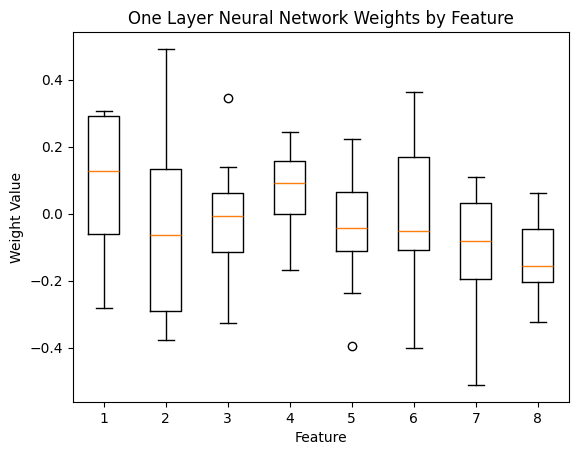

In [25]:
feature_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    feature_boxplot_dict["boxes"].append(list(model_dict["weights"][0][:,i]))
bias = list(model_dict["weights"][1])
plt.boxplot(feature_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Feature")
plt.xlabel("Feature")
plt.ylabel("Weight Value")

##### 6.1b: One Layer NN Weights by Neuron

Text(0, 0.5, 'Weight Value')

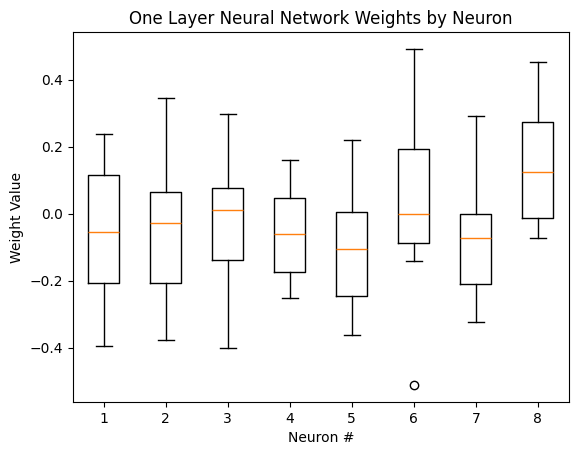

In [26]:
neuron_boxplot_dict = {"boxes":[]}
for i in range(len(model_dict["weights"][0])):
    neuron_boxplot_dict["boxes"].append(list(model_dict["weights"][0][i]))
bias = list(model_dict["weights"][1])
plt.boxplot(neuron_boxplot_dict["boxes"])
plt.title("One Layer Neural Network Weights by Neuron")
plt.xlabel("Neuron #")
plt.ylabel("Weight Value")

In [27]:
# maybe add the bias to each of these box plots?

#### 6.2: Five Layer Network

##### 6.2a: Over Five Layers, Visualize Change of Weights by Feature

Text(0, 0.5, 'Weight Value')

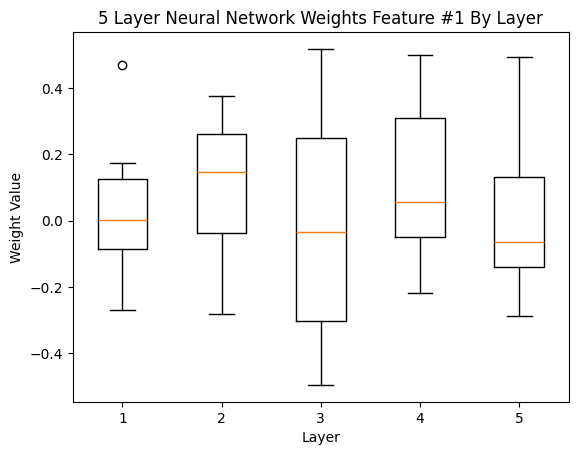

In [28]:
feature_boxplot_dict2 = {"boxes":[]}

# feature 1
for j in range(0,len(model_dict2['name'])-2, 2):
    feature_boxplot_dict2["boxes"].append(list(model_dict2['weights'][j][:,0]))

plt.boxplot(feature_boxplot_dict2["boxes"])
plt.title("5 Layer Neural Network Weights Feature #1 By Layer")
plt.xlabel("Layer")
plt.ylabel("Weight Value")

#### 6.3: Ten Layer Network

##### 6.3a: Over Ten Layers, Visualize Change of Weights by Feature

Text(0, 0.5, 'Weight Value')

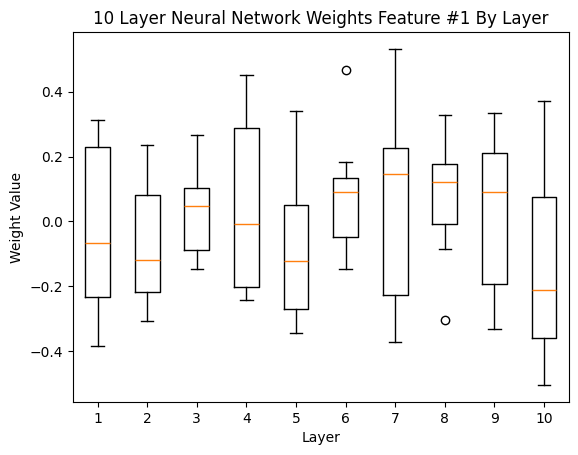

In [29]:
feature_boxplot_dict3 = {"boxes":[]}

# feature 1
for j in range(0,len(model_dict3['name'])-2, 2):
    feature_boxplot_dict3["boxes"].append(list(model_dict3['weights'][j][:,0]))

plt.boxplot(feature_boxplot_dict3["boxes"])
plt.title("10 Layer Neural Network Weights Feature #1 By Layer")
plt.xlabel("Layer")
plt.ylabel("Weight Value")